
Script prepared by Dr. Dasaraden Mauree                 
Contact: EPFL                                           
  dasaraden.mauree@epfl.ch / dasaraden.mauree@gmail.com  
                                                         
   use this script to read radiometer data from MoTUS,   
   calculate mean data and to create some plots.    


In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
#importing necessary packages

import glob
import pandas as pd
import numpy as np
import math
from datetime import datetime, timedelta
import re


path =r'2018-11-14_Mesures_MoTUS' # use your path
#allFiles = glob.glob(path + "/*anem*")
j = pd.DataFrame()
hourlymean = pd.DataFrame()
df=pd.DataFrame()
eachday=pd.DataFrame()
result=pd.DataFrame()

#Declaring all variables 
pyrup =[]     #Pyranometer Upper Irradiance [W/m^2]
pyrdown=[]    #Pyranometer Lower Irradiance [W/m^2]
pygup=[]      #Pyrgeometer Upper Irradiance [W/m^2]
pygdown=[]    #Pyrgeometer Lower Irradiance [W/m^2]
a=[]          #Albedo [-] (Between [0;1] - Snow : 0.9 ; Grassland : 0.3.)
nsr=[]        #Net Solar radiation [W/m^2](Solar radiation that is absorbed by the earth surface. Always positive. 0 at night.)
ntr=[]        #Net (total) radiation [W/m^2]
nfr=[]        #Net Far Infrared radiation [W/m^2] (o   Often negative. Roughly independent of ambient temperature.)
skytemp=[]    #Sky temperature [°C](Clear conditions : sky temperature lower than ambient temperature & cloudy conditions : sky temperature is equal to ambient temperature.)
grdtemp=[]    #Ground temperature [°C] (Assumed to be roughly equal to ambiant temperature. May be lower than ambient temperature during the night and higher during the day.)
time=[]       #Timestamp

#Opening file and saving in array
allFiles = glob.glob(path + "/*radiometre.txt") 
    
for file in allFiles:
        
    fil=pd.read_csv(file, header=None, comment=',', error_bad_lines=False) #for20hz anem
    fileArray=np.array(fil)
              
    for k,line in enumerate(fileArray):
    
            #Reading time step
        timeStr=line[-1]
        contime=datetime.strptime(' '.join([timeStr]), '%d.%m.%Y %H:%M:%S')
          
            #storing in individual array
        time.append(contime)
        pyrup.append(float(line[0]))
        pyrdown.append(float(line[1]))
        pygup.append(float(line[2]))
        pygdown.append(float(line[3]))
        a.append(float(line[4]))
        nsr.append(float(line[5]))
        ntr.append(float(line[6]))
        nfr.append(float(line[7]))
        skytemp.append(float(line[8]))
        grdtemp.append(float(line[9]))

            
    j['datetime']=pd.to_datetime(time)
    j=j.set_index('datetime')
    j['Pyranometer Upper Irradiance [W/m$^2$]']=pyrup
    j['Pyranometer Lower Irradiance [W/m$^2$]']=pyrdown
    j['Pyrgeometer Upper Irradiance [W/m$^2$]']=pygup
    j['Pyrgeometer Lower Irradiance [W/m$^2$]']=pygdown
    j['Albedo [-]']=a
    j['Net Solar radiation [W/m$^2$]']=nsr
    j['Net (total) radiation [W/m$^2$]']=ntr
    j['Net Far Infrared radiation [W/m$^2$]']=nfr
    j['Sky temperature [°C]']=skytemp
    j['Radiometer Ground temperature [°C]']=grdtemp
          
    hourlymean=j.resample('T').mean()
    hourlymean=hourlymean[:-1]        
    hourlymean=hourlymean.round(1)

    pyrup, pyrdown, pygup,pygdown,a,nsr,ntr,nfr,skytemp,grdtemp,time=[],[],[],[],[],[],[],[],[],[],[]
    j = pd.DataFrame()
    eachday=eachday.append(hourlymean)
                   
result = eachday.sort_index(axis=0, ascending=True)
eachday.to_csv('radiometer.csv', header=True, index=True, sep=' ', mode='a')
hourlymean=pd.DataFrame()
result=pd.DataFrame()

In [3]:
j

""


Text(0,0.5,'Pyranometer Upper Irradiance [W/m$^2$]')

Text(0.5,0,'Time (in Hours)')

/Users/gianlucamancini/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


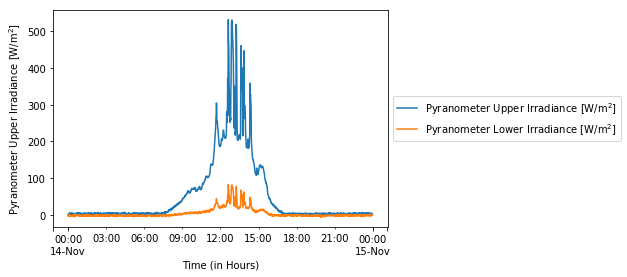

In [4]:
import matplotlib.pyplot as plt
import matplotlib.dates as dates
%matplotlib inline 
eachday[['Pyranometer Upper Irradiance [W/m$^2$]','Pyranometer Lower Irradiance [W/m$^2$]']].plot()
#plt.figtext(0.15,0.85,'(a)')
plt.ylabel('Pyranometer Upper Irradiance [W/m$^2$]')
plt.xlabel('Time (in Hours)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='minor',      # both major and minor ticks are affected
    bottom='on',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='on') # labels along the bottom edge are off
# plt.savefig('pyranometer.png', bbox_inches='tight',dpi=1200)

Text(0,0.5,'Pyrgeometer Upper Irradiance [W/m$^2$]')

Text(0.5,0,'Time (in Hours)')

/Users/gianlucamancini/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


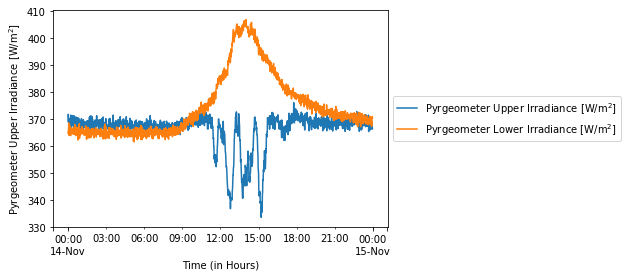

In [5]:
eachday[['Pyrgeometer Upper Irradiance [W/m$^2$]','Pyrgeometer Lower Irradiance [W/m$^2$]']].plot()
#plt.figtext(0.15,0.85,'(b)')
plt.ylabel('Pyrgeometer Upper Irradiance [W/m$^2$]')
plt.xlabel('Time (in Hours)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='minor',      # both major and minor ticks are affected
    bottom='on',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='on') # labels along the bottom edge are off
# plt.savefig('pyrgeometer.png', bbox_inches='tight',dpi=1200)

Text(0,0.5,'Surface temperature [°C]')

Text(0.5,0,'Time (in Hours)')

/Users/gianlucamancini/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


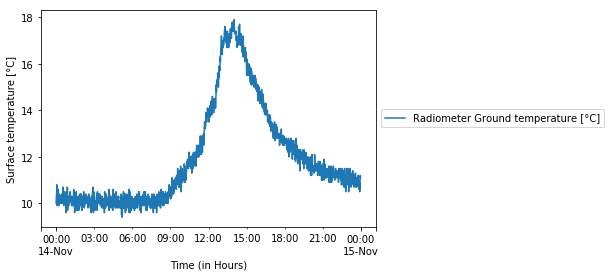

In [6]:
import matplotlib.pyplot as plt
import matplotlib.dates as dates
%matplotlib inline 
eachday[['Radiometer Ground temperature [°C]']].plot()
#plt.figtext(0.15,0.85,'(a)')
plt.ylabel('Surface temperature [°C]')
plt.xlabel('Time (in Hours)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='minor',      # both major and minor ticks are affected
    bottom='on',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='on') # labels along the bottom edge are off
# plt.savefig('surftemp_radiometer.png', bbox_inches='tight',dpi=1200)

The code below reads the temperature files in case these are not stored in one single file TempAll

In [8]:
# with this little modification all files with Temp are found
path =r'2018-11-14_Mesures_MoTUS' # use your path
allFiles = glob.glob(path + "/*Temp*.txt") 
allFiles

['2018-11-14_Mesures_MoTUS/141118TempWest.txt',
 '2018-11-14_Mesures_MoTUS/141118TempMat.txt',
 '2018-11-14_Mesures_MoTUS/141118TempEast.txt',
 '2018-11-14_Mesures_MoTUS/141118TempSouth.txt',
 '2018-11-14_Mesures_MoTUS/141118TempNorth.txt']

In [9]:
def temperature_orientation(x):
    
    pattern='Temp(.+?).txt'
    z=re.search(pattern, x)
    return z.group(1)

def get_temperatures(name, line, lists):
    
    lists[name.lower()+'temp'].append(line[0])

In [24]:
#importing necessary packages

import glob
import pandas as pd
import numpy as np
import math
from datetime import datetime, timedelta
import re


path =r'2018-11-14_Mesures_MoTUS' # use your path
#allFiles = glob.glob(path + "/*anem*")
k = pd.DataFrame()
hourlymean = pd.DataFrame()
eachdaysurf=pd.DataFrame()

#Declaring all variables 
mattemp=[]      #Ground temperature [°C] (Assumed to be roughly equal to ambiant temperature. May be lower than ambient temperature during the night and higher during the day.)
northtemp=[]    #Façade facing North [°C]
easttemp=[]     #Façade facing East [°C]
southtemp=[]    #Façade facing South [°C]
westtemp=[]     #Façade facing West [°C]
time=[]         #Timestamp

lists={'mattemp':mattemp, 'northtemp':northtemp, 'easttemp':easttemp, 'southtemp':southtemp, 'westtemp':westtemp}

#Opening file and saving in array
allFiles = glob.glob(path + "/*Temp*.txt") 
names=pd.Series(allFiles).apply(lambda x: temperature_orientation(str(x)))

for file, name in zip(allFiles, names):
        
    fil=pd.read_csv(file, header=None, comment=',', error_bad_lines=False) #for20hz anem
    fileArray=np.array(fil)
    
    print (name)
              
    for i,line in enumerate(fileArray):
    
            #Reading time step
        timeStr=line[-1]
        contime=datetime.strptime(' '.join([timeStr]), '%d.%m.%Y %H:%M:%S')
          
            #storing in individual array
        time.append(contime)
        
        get_temperatures(name, line, lists)
        
k['datetime']=pd.to_datetime(time[:len(mattemp)])
k=k.set_index('datetime')
k['Sensor Ground temperature [°C]']=mattemp
k['North temperature [°C]']=northtemp
k['East temperature [°C]']=easttemp
k['South temperature [°C]']=southtemp
k['West temperature [°C]']=westtemp

hourlymean=k.resample('T').mean()
hourlymean=hourlymean[:-1]        
hourlymean=hourlymean.round(1)

eachdaysurf=eachdaysurf.append(hourlymean)

result = eachdaysurf.sort_index(axis=0, ascending=True)
result.to_csv('surf_temp.txt', header=True, index=True, sep=' ', mode='a')

West
Mat
East
South
North


Text(0,0.5,'Surface temperature [°C]')

Text(0.5,0,'Time (in Hours)')

/Users/gianlucamancini/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


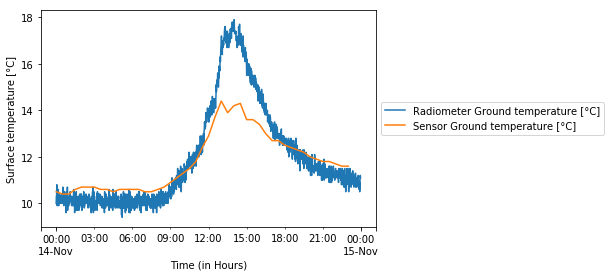

In [15]:
import matplotlib.pyplot as plt
import matplotlib.dates as dates
%matplotlib inline 
#y1=eachday['Radiometer Ground temperature [°C]']
#y2=eachdaysurf['Sensor Ground temperature [°C]']
#plt.plot(y1)
ax = eachday['Radiometer Ground temperature [°C]'].plot()
eachdaysurf['Sensor Ground temperature [°C]'].plot(ax=ax)
#plt.plot(y2)
#plt.figtext(0.15,0.85,'(a)')
plt.ylabel('Surface temperature [°C]')
plt.xlabel('Time (in Hours)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='minor',      # both major and minor ticks are affected
    bottom='on',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='on') # labels along the bottom edge are off
plt.savefig('surftemp_radiometer.png', bbox_inches='tight',dpi=1200)

In [ ]:
y1